# Ch 3.13, Information Theory

Some notes that may help you understand this better.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's visualize the self-information of an event x from Equation 3.48: I(x)= - log P(x)

First, why is there a negative sign?  It's because probabilities run from 0 to 1, and the log in this range is always negative.

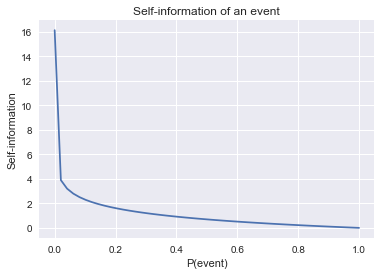

In [2]:
x = [p for p in np.linspace(0.0000001,1,50)]
#fig = plt.figure()
plt.plot(x, -np.log(x))
plt.xlabel("P(event)")
plt.ylabel("Self-information")
plt.title("Self-information of an event")

Now let's examine the Shannon entropy of a distribution (equation 3.49).  
Figure 3.5 plots the Shannon entropy of a Bernoulli distribution (which governs discrete random variables that can take on only 2 values).  See the checked-in file 3_13_figure_3_5info.jpg for a hand derivation of the entropy.  

But if you want to make the plot yourself, here is code to do so.

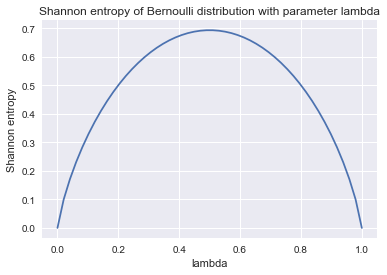

In [3]:
def P_bern(x, lam):
    """
    Returns the probability of random variable taking on value x from a Bernoulli distribution
    whose parameter is lambda.  lambda defines the probability of observing x = 1.
    """
    assert x in [0,1]
    assert lam >= 0 and lam <= 1
    
    return lam**x * (1-lam)**(1-x)

#%%
def entropy_bern(lam):
    """
    Returns the Shannon entropy of a Bernoulli distribution with parameter lambda.
    """
    assert lam >= 0 and lam <= 1
    
    sum = 0
    # Sum over 0 and 1, the only two possible observable values in a Bernoulli trial
    for x in [0,1]:
        sum += P_bern(x, lam) * np.log(P_bern(x, lam))
    return -sum

#%%
fig = plt.figure()
lam = [p for p in np.linspace(0.0000001,1-.0000001,50)]
plt.plot(lam, [entropy_bern(a) for a in lam])
plt.xlabel("lambda")
plt.ylabel("Shannon entropy")
plt.title("Shannon entropy of Bernoulli distribution with parameter lambda")